In [5]:
%cd ../

/mnt2/kireev/pycharm-deploy/pytorch-lifestream/experiments/scenario_alpha_battle


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

In [38]:
import matplotlib.pyplot as plt

In [12]:
from glob import glob
import json

In [63]:
df_results = []
for p in glob('conf/embeddings_validation.work/m_lgbm__f_emb_mles__???__i_?/results.json'):
    with open(p, 'r') as f:
        df_results.append(json.load(f))

In [64]:
df_baseline = []
for p in glob('conf/embeddings_validation.work/m_lgbm__f_baseline__i_?/results.json'):
    with open(p, 'r') as f:
        df_baseline.append(json.load(f))
baseline_val = np.array([t['scores_valid']['auroc'] for l in df_baseline for t in l])
baseline_test = np.array([t['scores_test']['auroc'] for l in df_baseline for t in l])

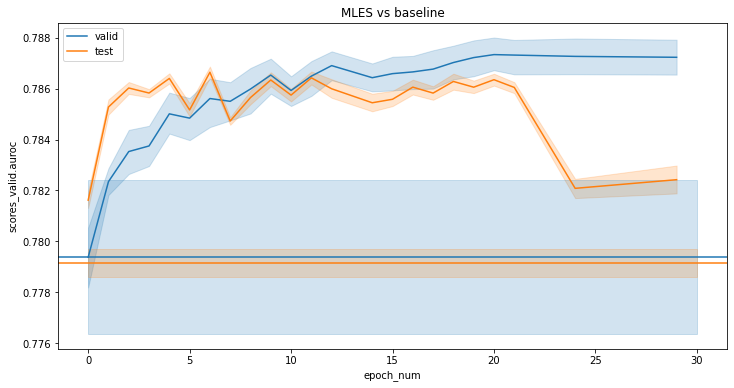

In [68]:
_, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(
    data=pd.json_normalize([t for l in df_results for t in l]) 
    .assign(epoch_num=lambda x: pd.to_numeric(x['feature_name'].str.extract(r'emb_mles__(\d+)')[0])),
    x='epoch_num',
    y='scores_valid.auroc',
    ax=ax,
    ci=65,
)
sns.lineplot(
    data=pd.json_normalize([t for l in df_results for t in l]) 
    .assign(epoch_num=lambda x: pd.to_numeric(x['feature_name'].str.extract(r'emb_mles__(\d+)')[0])),
    x='epoch_num',
    y='scores_test.auroc',
    ax=ax,
    ci=65,
)
plt.axhline(baseline_val.mean(), color=plt.get_cmap('tab10')(0), label='valid')
plt.fill_between([0, 30], 
                 baseline_val.mean() - baseline_val.std(), baseline_val.mean() + baseline_val.std(), 
                 color=plt.get_cmap('tab10')(0), alpha=0.2)
plt.axhline(baseline_test.mean(), color=plt.get_cmap('tab10')(1), label='test')
plt.fill_between([0, 30], 
                 baseline_test.mean() - baseline_test.std(), baseline_test.mean() + baseline_test.std(), 
                 color=plt.get_cmap('tab10')(1), alpha=0.2)

plt.title('MLES vs baseline')
plt.legend()
plt.show()